In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# A Wine Quality Prediction System is a machine learning-based system designed to 
# evaluate the quality of wine based on various physicochemical properties. 
# The system uses historical data of wine samples, including features like acidity, 
# alcohol content, pH level, residual sugar, and more, to predict the quality of 
# new wine samples on a predefined scale (usually 1 to 10).

In [3]:
# Wine Quality Dataset Description
# The Wine Quality Dataset is a well-known dataset available in the UCI Machine Learning Repository. 
# It contains physicochemical attributes of red and white wine samples, 
# along with their quality scores, rated by wine tasters. The dataset is commonly used 
# for regression and classification tasks in machine learning.

# Dataset Overview
# Number of Samples:
# Red wine: 1,599 samples
# Number of Features: 11 (numerical)

# Target Variable: Wine Quality Score (integer value ranging from 0 to 10)
# Type: Multivariate dataset

# Dataset Attributes
# Feature	Description	Data Type

# Fixed Acidity	Concentration of non-volatile acids (e.g., tartaric acid)	Float

# Volatile Acidity	Concentration of volatile acids (e.g., acetic acid)	Float

# Citric Acid	Amount of citric acid present (adds freshness)	Float


# Residual Sugar	Amount of sugar left after fermentation	Float


# Chlorides	Salt content in the wine	Float


# Free Sulfur Dioxide	SO₂ available to prevent microbial growth	Float


# Total Sulfur Dioxide	Total SO₂ (free + bound), used as a preservative	Float


# Density	Mass per unit volume, affects wine body	Float

# pH	Measure of acidity or alkalinity	Float

# Sulphates	Sulfur compounds contributing to antimicrobial properties	Float

# Alcohol	Alcohol content (% volume)	Float

# Quality (Target Variable)	Wine quality score (scale 0–10)	Integer

# Target Variable (Quality Score) Distribution

# The wine quality is rated on a scale of 0 to 10, but most scores range from 3 to 9.
# The majority of wines have quality scores between 5 and 7, 
# making it an imbalanced dataset where extreme quality ratings (0, 1, 9, 10) are rare.
    
# Dataset Usage
# Regression Task: Predicting the exact quality score as a continuous variable.
# Classification Task: Converting scores into categories (e.g., Low Quality (≤5), Medium (6), High Quality (≥7)).
# Feature Analysis: Understanding how different physicochemical properties affect wine quality

In [ ]:
# step-1 Data collection

In [6]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.shape

(1599, 12)

In [8]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# step-2 Data cleaning

In [10]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
wine.duplicated().sum()

np.int64(240)

In [13]:
wine.drop_duplicates(inplace=True,ignore_index=True)

In [14]:
wine.shape

(1359, 12)

In [15]:
# step-3 EDA

In [16]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [17]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
wine['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

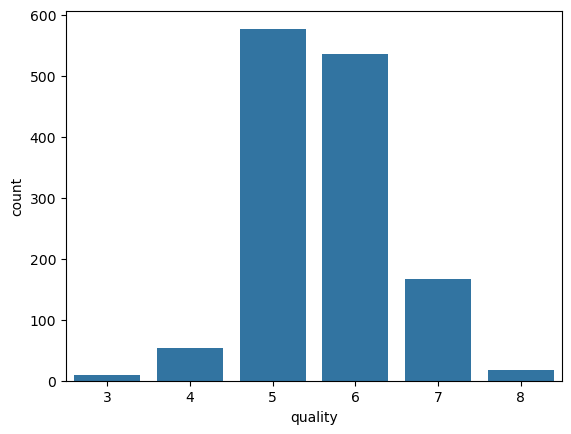

In [19]:
sns.countplot(x=wine['quality'])
plt.show()

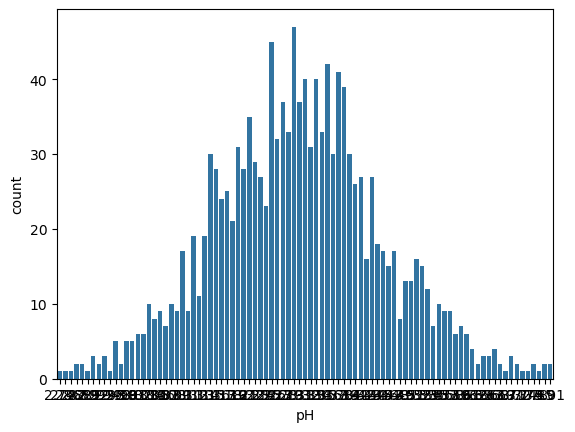

In [20]:
sns.countplot(x=wine['pH'])
plt.show()

<Axes: ylabel='Density'>

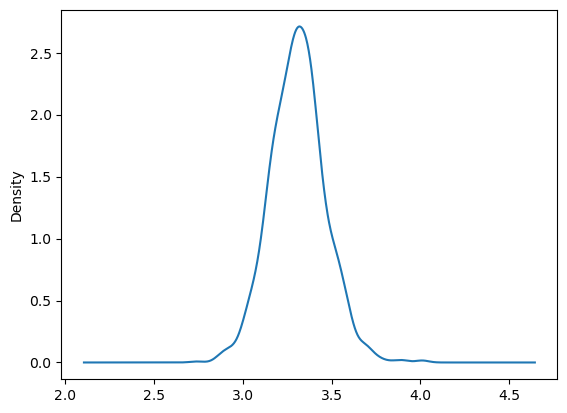

In [21]:
wine['pH'].plot(kind='kde')

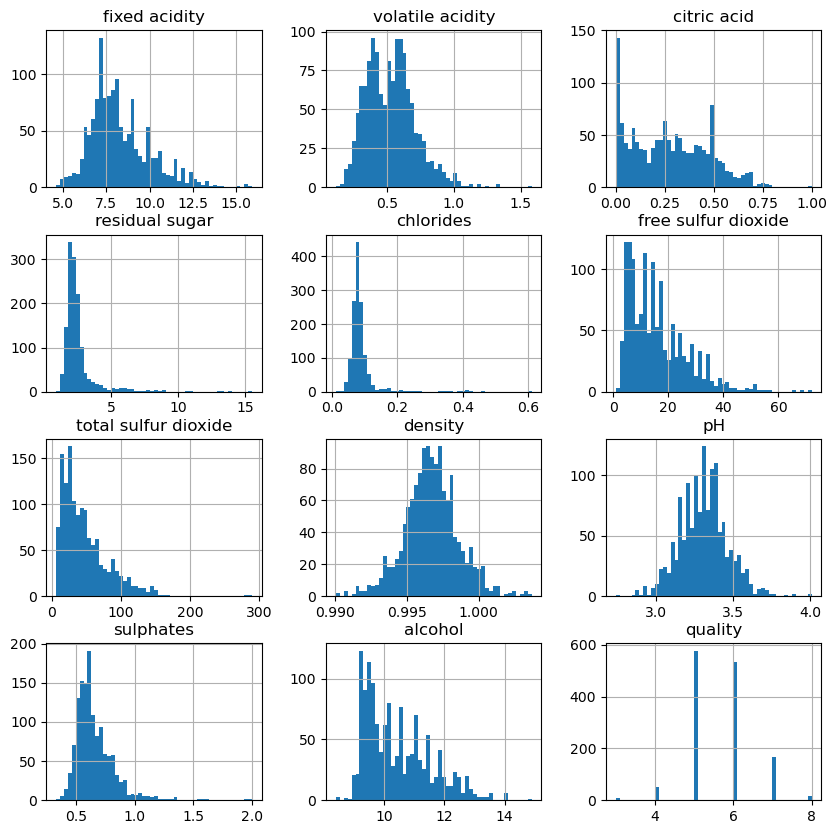

In [22]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: >

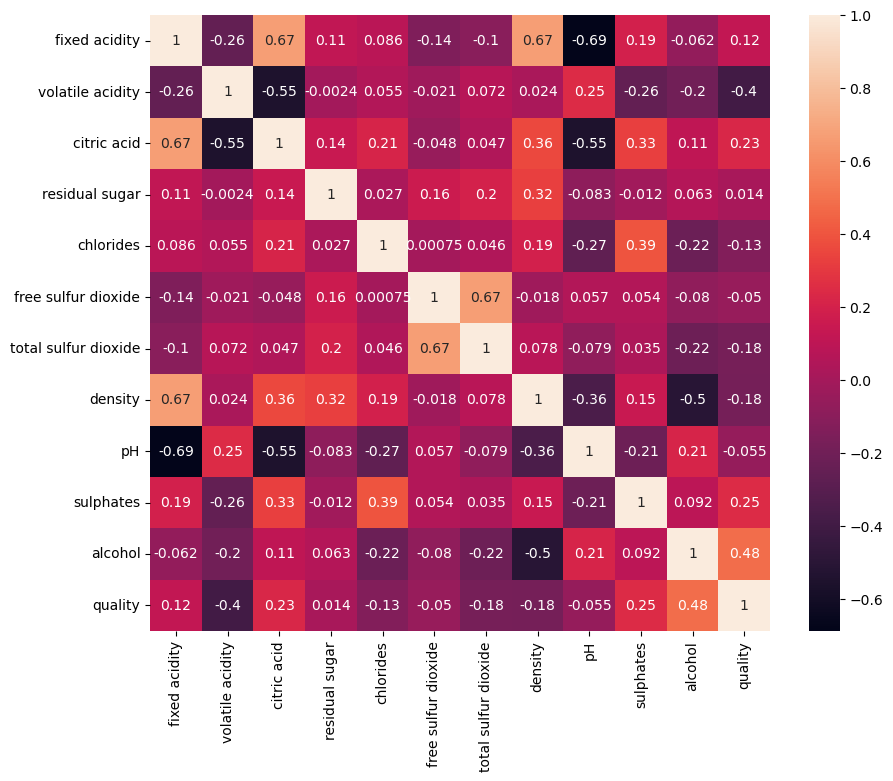

In [23]:
plt.figure(figsize=(10,8))
corr = wine.corr()
sns.heatmap(corr,annot=True)

In [24]:
# pH anf fixed acidity has strong negative corr
# citric acid and fixed acidity has strong positive corr
# free sulpjure dioxide and total sulphure dioxide has strong positive corr

<Axes: xlabel='quality', ylabel='alcohol'>

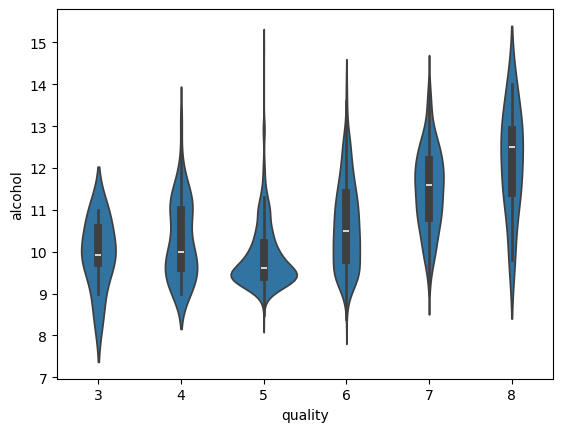

In [25]:
sns.violinplot(x='quality', y='alcohol', data=wine)

In [26]:
# feature selection

In [27]:
wine['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [28]:
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]

In [30]:
wine['goodquality'] .value_counts()

goodquality
0    1175
1     184
Name: count, dtype: int64

In [31]:
# step-4 ML pre

In [32]:
X = wine.drop(['quality','goodquality'], axis = 1)
y = wine['goodquality']

In [34]:
# project 
# DL >> ANN CNN RNN NLP 
# python >>coding
# sql ,powerbi excel 
# LLM gen AI 